In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Modelos
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score



In [4]:
from sklearn.datasets import fetch_openml

# Cargar datos
bike = fetch_openml(name="Bike_Sharing_Demand", version=2, as_frame=True)
df = bike.frame

In [5]:
df.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed,count
0,spring,0,1,0,False,6,False,clear,9.84,14.395,0.81,0.0,16
1,spring,0,1,1,False,6,False,clear,9.02,13.635,0.80,0.0,40
2,spring,0,1,2,False,6,False,clear,9.02,13.635,0.80,0.0,32
3,spring,0,1,3,False,6,False,clear,9.84,14.395,0.75,0.0,13
4,spring,0,1,4,False,6,False,clear,9.84,14.395,0.75,0.0,1


In [8]:
# Preprocesamiento
# Convertir booleanos y texto a números
# Asegúrate de que 'holiday' y 'workingday' sean booleanos verdaderos (no strings como 'False')
df['holiday'] = df['holiday'].astype(str).str.lower().map({'false': 0, 'true': 1})
df['workingday'] = df['workingday'].astype(str).str.lower().map({'false': 0, 'true': 1})
df['weekday'] = df['weekday'].astype(int)

# Etiquetas numéricas para season y weather
le_season = LabelEncoder()
le_weather = LabelEncoder()
df['season'] = le_season.fit_transform(df['season'])  # spring=0, summer=1, etc.
df['weather'] = le_weather.fit_transform(df['weather'])  # clear=0, misty=1, etc.

In [9]:
# Variables predictoras (X) y variable objetivo (y)
X = df[['season', 'hour', 'holiday', 'weekday', 'workingday', 'weather', 'temp', 'feel_temp', 'humidity', 'windspeed']]
y = df['count']

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [10]:
# Entrenar modelos
modelos = {
    "Regresión Lineal": LinearRegression(),
    "Árbol de Decisión": DecisionTreeRegressor(random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "SVR": SVR(),
    "SVM (lineal)": SVR(kernel='linear')
}

In [12]:
from math import sqrt

# Evaluar cada modelo
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    print(f"\nModelo: {nombre}")
    print(f"R²: {r2_score(y_test, y_pred):.3f}")
    # print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")    Esto da error porque la version de sklearn utilizada no soporta que squared sea False
    print(f"RMSE: {sqrt(mean_squared_error(y_test, y_pred)):.2f}")




Modelo: Regresión Lineal
R²: 0.349
RMSE: 144.69

Modelo: Árbol de Decisión
R²: 0.716
RMSE: 95.51

Modelo: KNN
R²: 0.630
RMSE: 109.02

Modelo: SVR
R²: 0.353
RMSE: 144.19

Modelo: SVM (lineal)
R²: 0.305
RMSE: 149.51


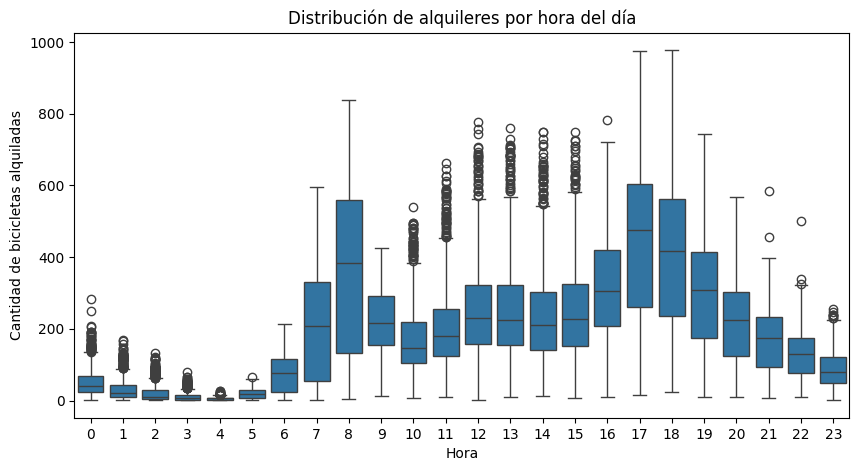

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x='hour', y='count', data=df)
plt.title("Distribución de alquileres por hora del día")
plt.xlabel("Hora")
plt.ylabel("Cantidad de bicicletas alquiladas")
plt.show()


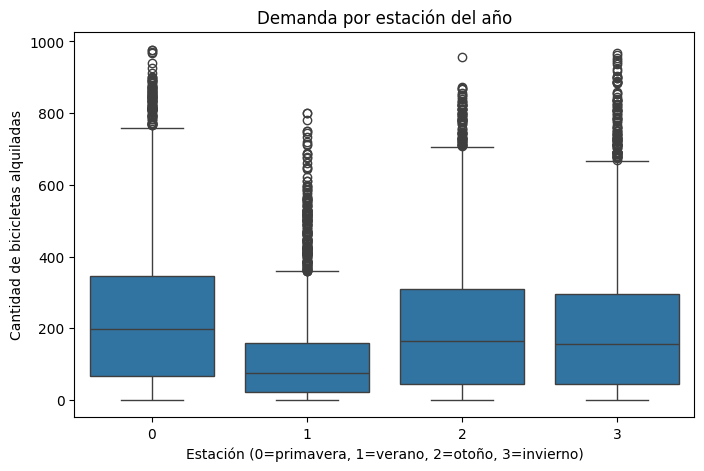

In [15]:
# Crear gráfico de cajas
plt.figure(figsize=(8, 5))
sns.boxplot(x='season', y='count', data=df)

# Título y ejes con etiquetas completas
plt.title("Demanda por estación del año")
plt.xlabel("Estación (0=primavera, 1=verano, 2=otoño, 3=invierno)")
plt.ylabel("Cantidad de bicicletas alquiladas")
plt.show()

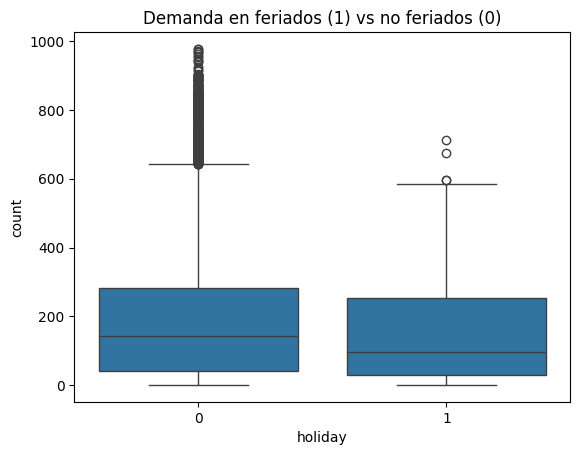

In [16]:
sns.boxplot(x='holiday', y='count', data=df)
plt.title("Demanda en feriados (1) vs no feriados (0)")
plt.show()


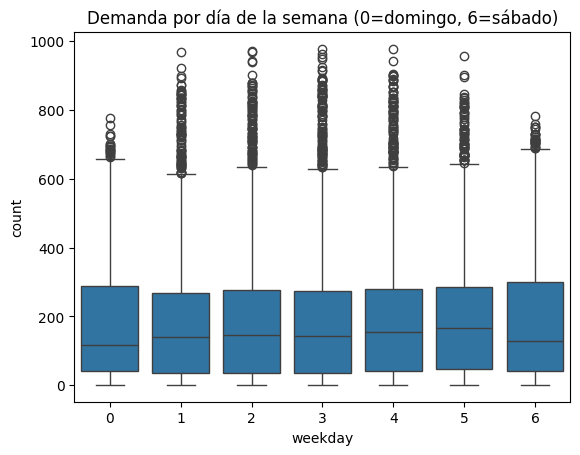

In [17]:
sns.boxplot(x='weekday', y='count', data=df)
plt.title("Demanda por día de la semana (0=domingo, 6=sábado)")
plt.show()


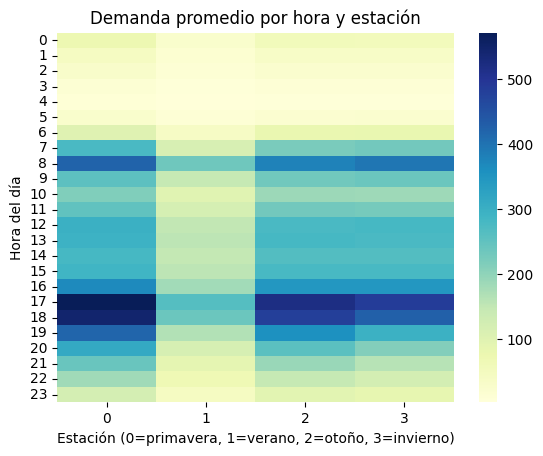

In [19]:
# Crear mapa de calor de hora vs estación
pivot = df.pivot_table(index='hour', columns='season', values='count', aggfunc='mean')
sns.heatmap(pivot, cmap='YlGnBu')
plt.title("Demanda promedio por hora y estación")
plt.xlabel("Estación (0=primavera, 1=verano, 2=otoño, 3=invierno)")
plt.ylabel("Hora del día")
plt.show()


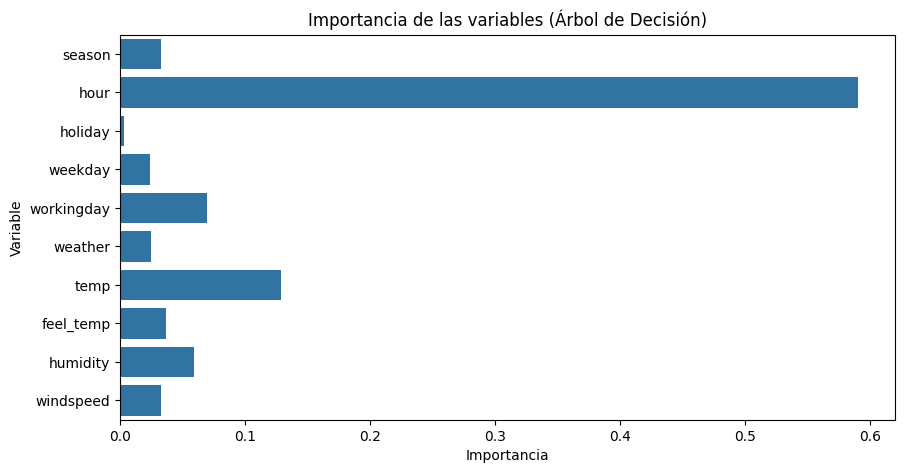

In [20]:
# Importancia de las variables según el árbol de decisión
feature_names = ['season', 'hour', 'holiday', 'weekday', 'workingday', 'weather', 'temp', 'feel_temp', 'humidity', 'windspeed']
importancias = modelos['Árbol de Decisión'].feature_importances_

# Graficar
plt.figure(figsize=(10, 5))
sns.barplot(x=importancias, y=feature_names)
plt.title("Importancia de las variables (Árbol de Decisión)")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()


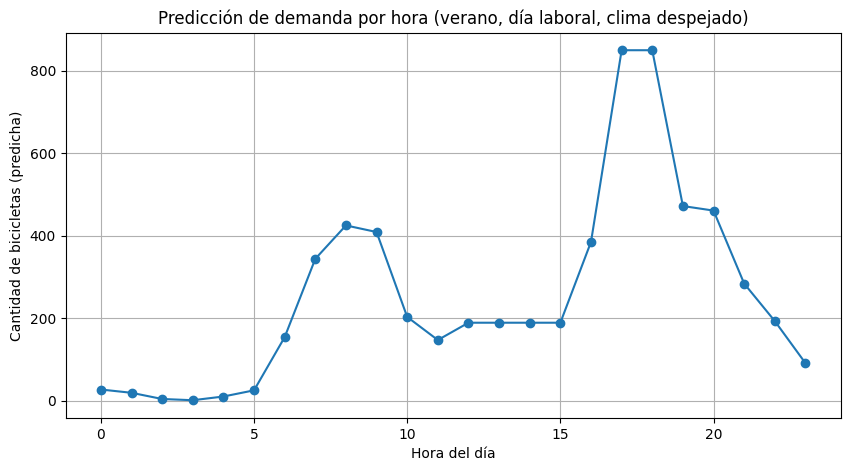

In [21]:
# Crear escenarios para analizar el efecto de las variables
import numpy as np

# Simular demanda por hora en verano (season=1), no feriado, día laboral, clima despejado (weather=0)
X_sim = pd.DataFrame({
    'season': [1]*24,
    'hour': list(range(24)),
    'holiday': [0]*24,
    'weekday': [2]*24,  # por ejemplo, martes
    'workingday': [1]*24,
    'weather': [0]*24,
    'temp': [25]*24,
    'feel_temp': [27]*24,
    'humidity': [0.5]*24,
    'windspeed': [10]*24
})

# Escalar igual que X_train
X_sim_scaled = scaler.transform(X_sim)

# Predecir con el mejor modelo (Árbol)
y_pred_sim = modelos["Árbol de Decisión"].predict(X_sim_scaled)

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(range(24), y_pred_sim, marker='o')
plt.title("Predicción de demanda por hora (verano, día laboral, clima despejado)")
plt.xlabel("Hora del día")
plt.ylabel("Cantidad de bicicletas (predicha)")
plt.grid()
plt.show()


## Conclusion

La demanda de bicicletas presenta dos picos muy marcados:

🔺 Primer pico entre las 7:00 y 9:00 AM, alcanzando alrededor de 400 alquileres.

🔺 Segundo pico entre las 17:00 y 18:00 PM, donde se observa la mayor demanda del día, superando los 850 alquileres.

Entre ambos picos, la demanda baja y se mantiene moderada al mediodía, y vuelve a descender progresivamente después de las 18:00 hrs.

Esto refleja un patrón típico de uso para transporte laboral o escolar, donde las bicicletas se usan principalmente para ir y volver del trabajo o estudios.

Por tanto, el modelo predice que las horas con más alquileres son 8:00 AM y 18:00 PM en días laborales de verano con buen clima.

**Este patrón predicho por el modelo se corrobora con los datos históricos visualizados en el gráfico de caja. Se observa claramente que:**

**Las horas con mayor mediana y mayor concentración de alquileres son entre las 8:00 y 9:00 AM y nuevamente entre las 17:00 y 18:00 PM, lo que coincide con los horarios punta laborales.**

**Durante el resto del día, la distribución se aplana, con menor y más dispersa demanda.**

**Por lo tanto, tanto los modelos predictivos como los datos observados respaldan la conclusión de que la mayor demanda ocurre durante las horas de traslado al trabajo o estudio, especialmente en días laborales y con buen clima.**

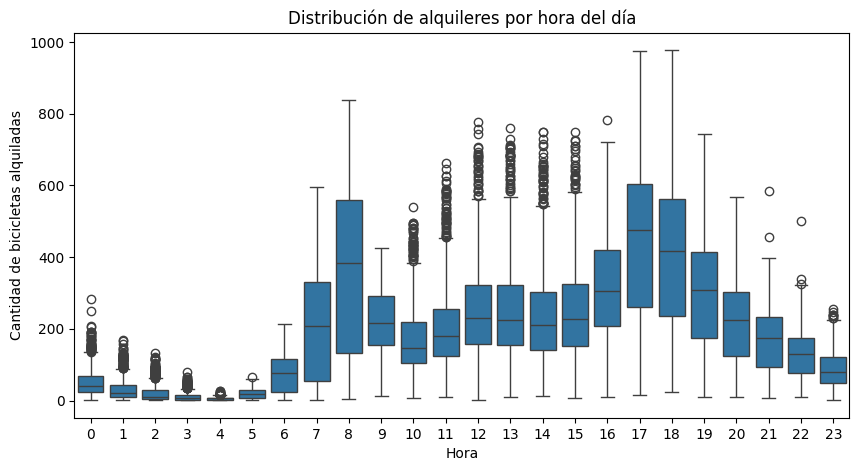

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x='hour', y='count', data=df)
plt.title("Distribución de alquileres por hora del día")
plt.xlabel("Hora")
plt.ylabel("Cantidad de bicicletas alquiladas")
plt.show()